## Pandas explode() Method

In [2]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df.explode('job_skills')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [5]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

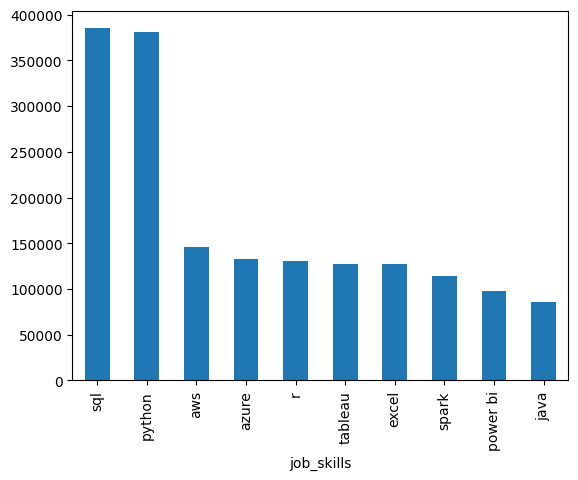

In [7]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [11]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()
skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [13]:
df_skills_count = skills_count.reset_index(name='skills_count')

df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [15]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final

,job_skills,job_title_short,skills_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280


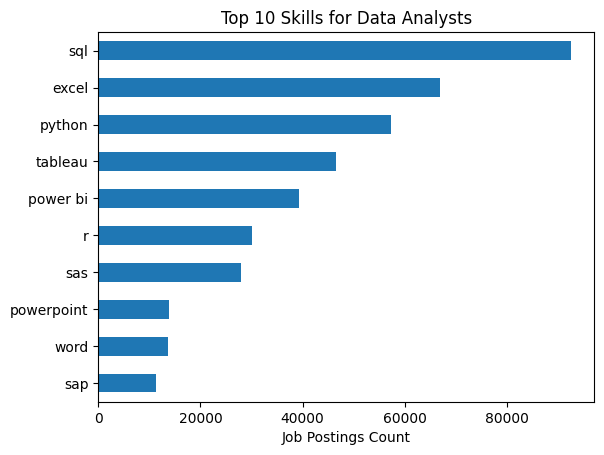

In [19]:
df_skill_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()